# Tugas Besar 2 IF3270 - Machine Learning
------------------------------------------
##### NIM/Nama  : 13517014/Yoel Susanto | 13517065/Andrian Cedric | 13517131/Jan Meyer Saragih | 13517137/Vincent Budianto
##### Nama file : Tubes2_13517014_Agglomerative.ipynb
##### Topik     : Implementasi modul Agglomerative Clustering
##### Tanggal   : 19 April 2020
------------------------------------------

In [1]:
from sklearn import datasets

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import fowlkes_mallows_score

from BagianA.src.kmeans import *
from BagianB.src.agglomerative import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Loading Iris Dataset

In [2]:
iris = datasets.load_iris()
data = iris.data
target = iris.target

## K-Means

K-Means merupakan salah satu metode unsupervised learning dengan metode *partitioning*.

Cara kita mengimplementasikan metode ini adalah sebagai berikut:
- Pertama kita menginisiasi class dengan mendefinisikan jumlah centroid (n_clusters) dan banyaknya iterasi (max_iteration)
- Menginisiasi centroid dengan memilih random titik dalam data
- Untuk setiap iterasi, dilakukan hal-hal sebagai berikut:
  - Untuk setiap titik, cari centroid yang terdekat dengan dia (jarak euclidean)
  - Untuk setiap centroid, rata-ratakan setiap titik dalam centroid tersebut dan gunakan rata-rata tersebut untuk menginisiasi pusat centroid baru.
  - Lakukan hal di atas terus-menerus hingga keanggotaan setiap titik centroid tidak berubah atau mencapai jumlah iterasi maksimal.
- K-Means akan menghasilkan label untuk setiap data berdasarkan label cluster.

In [3]:
km_clusters = kmeans(n_clusters=3)
km_clusters.fit(data)
km_target = km_clusters.labels
print('fowlkes mallows score:', fowlkes_mallows_score(target, km_target))
print('     silhouette score:', silhouette_score(data, km_target, metric='euclidean'))

fowlkes mallows score: 0.8208080729114153
     silhouette score: 0.5528190123564091


## Agglomerative

Agglomerative merupakan salah satu metode unsupervised learning dengan metode *hierarchical*.

Cara kita mengimplementasikan metode ini adalah sebagai berikut:
- Pertama kita menginisasi class dengan mendefinisikan jumlah centroid (n_clusters) dan tipe linkage
- Menginisiasi cluster sebannyak jumlah data
- Untuk setiap iterasi, dilakukan hal-hal sebagai berikut:
  - Buat sebuah matriks jarak (distance matriks), yaitu jarak antara setiap cluster dengan setiap cluster lainnya.
  - Cari jarak terkecil dari distance matriks yang bukan jarak dari 1 cluster ke cluster yang sama (karena pasti minimum).
  - Gabungkan kedua cluster yang jaraknya terkecil dengan memasukkan titik-titik yang terkait ke salah satu cluster dan menghapus cluster yang tidak dimasukkan.
  - Lakukan terus-menerus hingga jumlah cluster berkurang hingga n_clusters.
- Agglomerative akan memberikan label untuk setiap cluster yang merupakan hasil gabungan.

### Complete Linkage

Complete linkage merupakan salah satu linkage yang menyatakan jarak antar cluster merupakan:
- Jarak terjauh dari salah satu titik dalam satu cluster ke salah satu titik dalam cluster lain.

In [4]:
agglo_complete_clusters = agglomerative(n_clusters=3, linkage="complete")
agglo_complete_clusters.fit(data)
agglo_complete_target = agglo_complete_clusters.resultLabels
print('fowlkes mallows score:', fowlkes_mallows_score(target, agglo_complete_target))
print('     silhouette score:', silhouette_score(data, agglo_complete_target, metric='euclidean'))

fowlkes mallows score: 0.7686371028513819
     silhouette score: 0.5135953221192208


### Single Linkage

Single linkage merupakan salah satu linkage yang menyatakan jarak antar cluster merupakan:
- Jarak terdekat dari salah satu titik dalam satu cluster ke salah satu titik dalam cluster lain.

In [5]:
agglo_single_clusters = agglomerative(n_clusters=3, linkage="single")
agglo_single_clusters.fit(data)
agglo_single_target = agglo_single_clusters.resultLabels
print('fowlkes mallows score:', fowlkes_mallows_score(target, agglo_single_target))
print('     silhouette score:', silhouette_score(data, agglo_single_target, metric='euclidean'))

fowlkes mallows score: 0.7635170681000877
     silhouette score: 0.5121107753649304


### Average Linkage

Average linkage merupakan salah satu linkage yang menyatakan jarak antar cluster dengan:
- Merata-ratakan jarak setiap titik dalam satu cluster ke setiap titik dalam cluter lain.

In [6]:
agglo_average_clusters = agglomerative(n_clusters=3, linkage="average")
agglo_average_clusters.fit(data)
agglo_average_target = agglo_average_clusters.resultLabels
print('fowlkes mallows score:', fowlkes_mallows_score(target, agglo_average_target))
print('     silhouette score:', silhouette_score(data, agglo_average_target, metric='euclidean'))

fowlkes mallows score: 0.8407289157574822
     silhouette score: 0.5541608580282847


### Average Group Linkage

Average group linkage merupakan salah satu linkage yang menyatakan jarak antar cluster dengan:
- Merata-ratakan setiap titik dalam satu cluster
- Merata-ratakan setiap titik dalam cluster lain
- Menghitung jarak dari rata-rata setiap cluster

In [7]:
agglo_average_group_clusters = agglomerative(n_clusters=3, linkage="average_group")
agglo_average_group_clusters.fit(data)
agglo_average_group_target = agglo_average_group_clusters.resultLabels
print('fowlkes mallows score:', fowlkes_mallows_score(target, agglo_average_group_target))
print('     silhouette score:', silhouette_score(data, agglo_average_group_target, metric='euclidean'))

fowlkes mallows score: 0.8407289157574822
     silhouette score: 0.5541608580282847


## Iris Dataset Visualization

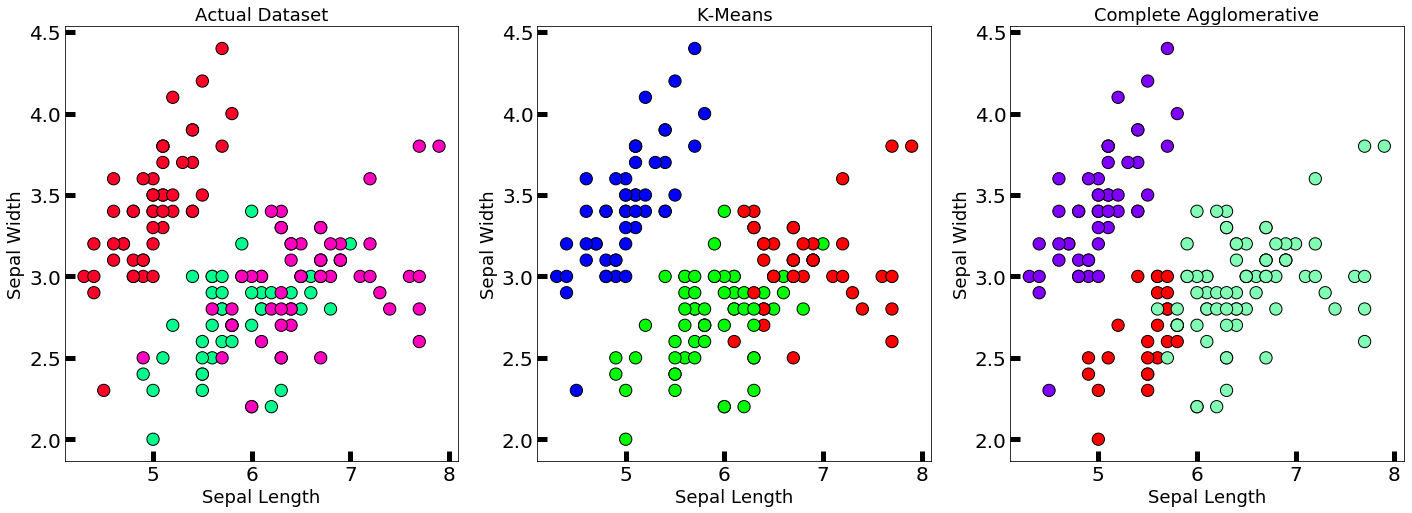

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(24,8))

# Actual dataset
axes[0].scatter(data[:,0], data[:,1], c=target, cmap='gist_rainbow', edgecolor='k', s=150)
axes[0].set_title('Actual Dataset', fontsize=18)
axes[0].set_xlabel('Sepal Length', fontsize=18)
axes[0].set_ylabel('Sepal Width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)

# K-Means dataset
axes[1].scatter(data[:,0], data[:,1], c=km_target, cmap='brg', edgecolor='k', s=150)
axes[1].set_title('K-Means', fontsize=18)
axes[1].set_xlabel('Sepal Length', fontsize=18)
axes[1].set_ylabel('Sepal Width', fontsize=18)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)

# Complete Agglomerative dataset
axes[2].scatter(data[:,0], data[:,1], c=agglo_complete_target, cmap='rainbow', edgecolor='k', s=150)
axes[2].set_title('Complete Agglomerative', fontsize=18)
axes[2].set_xlabel('Sepal Length', fontsize=18)
axes[2].set_ylabel('Sepal Width', fontsize=18)
axes[2].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)

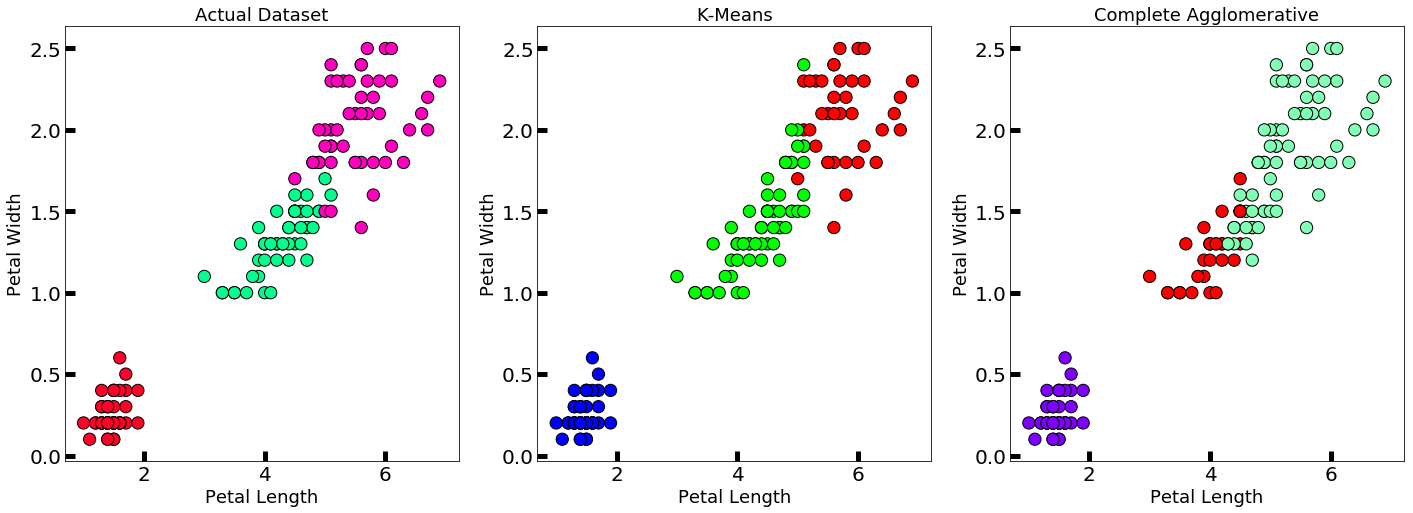

In [9]:
figPetal, axesPetal = plt.subplots(1, 3, figsize=(24,8))

# Actual dataset
axesPetal[0].scatter(data[:,2], data[:,3], c=target, cmap='gist_rainbow', edgecolor='k', s=150)
axesPetal[0].set_title('Actual Dataset', fontsize=18)
axesPetal[0].set_xlabel('Petal Length', fontsize=18)
axesPetal[0].set_ylabel('Petal Width', fontsize=18)
axesPetal[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)

# K-Means dataset
axesPetal[1].scatter(data[:,2], data[:,3], c=km_target, cmap='brg', edgecolor='k', s=150)
axesPetal[1].set_title('K-Means', fontsize=18)
axesPetal[1].set_xlabel('Petal Length', fontsize=18)
axesPetal[1].set_ylabel('Petal Width', fontsize=18)
axesPetal[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)

# Complete Agglomerative dataset
axesPetal[2].scatter(data[:,2], data[:,3], c=agglo_complete_target, cmap='rainbow', edgecolor='k', s=150)
axesPetal[2].set_title('Complete Agglomerative', fontsize=18)
axesPetal[2].set_xlabel('Petal Length', fontsize=18)
axesPetal[2].set_ylabel('Petal Width', fontsize=18)
axesPetal[2].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)

## Cluster Visualization Analysis

### K-Means

Hasil yang diberikan sudah cukup baik. 

Namun, tidak stabil karena K-Means sangat bergantung pada inisialisasi cluster.
Di saat inisialisasi cluster bagus, maka hasil yang dihasilkan bisa memiliki fowlkes-mallows score yang melebihi 0,8 dan silhouette coefficient di atas 0,5.

Namun, terkadang di saat inisialisasi jelek, terutama ketika diinisialisasi dua centroid pada label yang sama di data asli (terutama ketika dua pusat cluster memiliki label sentosa di data asli), hasil yang dihasilkan tidak baik.

Namun, dapat dilihat hasil masih merepresentasikan data dengan baik.

### Agglomerative

Hasil yang diberikan sudah baik.

Hasil ini stabil karena algoritma agglomerative tidak bergantung pada inisialisasi cluster. Seperti yang dilihat hasil yang dihasilkan sudah mirip dengan hasil yang asli sehingga dapat dinyatakan bagus.

Linkage yang bagus adalah average linkage atau average group linkage, diikuti oleh complete linkage, lalu single linkage (diurutkan berdasarkan nilai fowlkes-mallows dan silhouette coefficient). 
- Single linkage dinilai buruk karena bisa saja jarak terdekat antar titik di kedua cluster tidak merepresentasikan jarak yang sebenarnya dari 2 cluster itu. Terlalu optimistis.
- Complete linkage diharapkan memiliki nilai yang baik, namun hasil yang diberikan juga tidak sebaik average linkage.
- Average linkage dan average group linkage, yang merupakan rata-rata memberikan hasil yang terbaik.

## Pembagian Tugas

- 13517014: 
- 13517065:
- 13517131: Agglomerative clustering process, linkage, laporan notebook
- 13517137: